# Анализ БД книжного магазина

## Цель исследования

Ваша компания купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

## Описание данных

Таблица **`books`** cодержит данные о книгах:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

Таблица **`authors`** cодержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

Таблица **`publishers`** cодержит данные об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

Таблица **`ratings`** cодержит данные о пользовательских оценках книг:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

Таблица **`reviews`** cодержит данные о пользовательских обзорах:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя автора обзора;
- `text` — текст обзора.

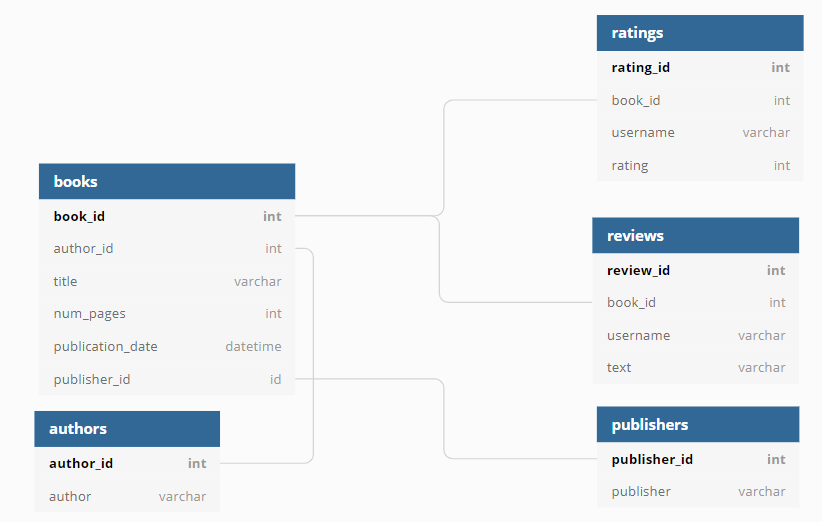

## Подготовительная часть

In [1]:
# Импортируем библиотеки

import pandas as pd
import sqlalchemy as sa

In [2]:
# Устанавливаем параметры

db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# Сохраняем коннектор

engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
# Чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas

def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    
    '''Открываем соединение, получаем данные из sql, закрываем соединение'''
    
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

## Обзор таблиц в БД

In [4]:
table_1 = '''
SELECT *
FROM books
LIMIT 5;
'''

get_sql_data(table_1)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
table_2 = '''
SELECT *
FROM authors
LIMIT 5;
'''

get_sql_data(table_2)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
table_3 = '''
SELECT *
FROM publishers
LIMIT 5;
'''

get_sql_data(table_3)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [7]:
table_4 = '''
SELECT *
FROM ratings
LIMIT 5;
'''

get_sql_data(table_4)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [8]:
table_5 = '''
SELECT *
FROM reviews
LIMIT 5;
'''

get_sql_data(table_5)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Исследование данных в БД

### Количество книг, вышедших после 1 января 2000 года

In [9]:
query_1 = '''
SELECT COUNT(*)
FROM books
WHERE publication_date >= '2000-01-01';
'''

get_sql_data(query_1)

,count
0,821


После 1 января 2000 года вышла 821 книга.

### Количество обзоров и средняя оценка каждой книги

In [14]:
query_2_3 = '''SELECT 
    books.title, 
    (SELECT COUNT(*) FROM reviews WHERE reviews.book_id = books.book_id) AS review_count, 
    AVG(ratings.rating) AS average_rating
FROM 
    books
LEFT JOIN ratings ON books.book_id = ratings.book_id
GROUP BY 
    books.book_id;
'''

get_sql_data(query_2_3)

,title,review_count,average_rating
0,The Body in the Library (Miss Marple #3),2,4.500000
1,Galápagos,2,4.500000
2,A Tree Grows in Brooklyn,5,4.250000
3,Undaunted Courage: The Pioneering First Missio...,2,4.000000
4,The Prophet,4,4.285714
...,...,...,...
995,Alice in Wonderland,4,4.230769
996,A Woman of Substance (Emma Harte Saga #1),2,5.000000
997,Christine,3,3.428571
998,The Magicians' Guild (Black Magician Trilogy #1),2,3.500000


Для каждой книги в поле `review_count` указано количество обзоров, а в поле `average_rating` — средняя оценка из обзоров.

### Издательства, выпустившие больше всего книг с 50 и более страницами

In [16]:
query_3 = '''
SELECT 
    publishers.publisher,
    COUNT(books.book_id) AS book_count
FROM 
    books
JOIN publishers ON books.publisher_id = publishers.publisher_id
WHERE 
    books.num_pages > 50
GROUP BY 
    publishers.publisher_id
ORDER BY 
    book_count DESC
LIMIT 1;
'''

get_sql_data(query_3)

,publisher,book_count
0,Penguin Books,42


Издательство Penguin Books выпустило больше всего книг объёмом более 50 страниц — 42 шт.

### Автор с самой высокой средней оценкой книг (с 50 и более оценками)

In [17]:
query_4 = '''
SELECT
    authors.author,
    AVG(sub.avg_rating) AS average_rating
FROM (
    SELECT
        books.author_id,
        books.book_id,
        AVG(ratings.rating) AS avg_rating
    FROM 
        ratings
    JOIN books ON books.book_id = ratings.book_id
    GROUP BY books.author_id, books.book_id
    HAVING COUNT(ratings.rating_id) >= 50
    ) AS sub
JOIN authors ON authors.author_id = sub.author_id
GROUP BY authors.author
ORDER BY average_rating DESC
LIMIT 1;
'''

get_sql_data(query_4)

,author,average_rating
0,J.K. Rowling/Mary GrandPré,4.283844


Автор **J.K. Rowling/Mary GrandPré** получила самую высокую среднюю оценку среди авторов книг с 50 и более оценками — **4.283844**.

### Среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [18]:
query_5 = '''
SELECT 
    AVG(review_count) AS average_review_count
FROM 
    (SELECT 
         COUNT(reviews.review_id) AS review_count
     FROM 
         reviews
     WHERE 
         reviews.username IN 
             (SELECT 
                  ratings.username
              FROM 
                  ratings
              GROUP BY 
                  ratings.username
              HAVING 
                  COUNT(ratings.rating_id) > 48)
     GROUP BY 
         reviews.username) AS subquery;
'''

get_sql_data(query_5)

,average_review_count
0,24.0


Среднее количество обзоров у пользователей, поставивших более 48 оценок, равняется 24.

## Результаты исследования

В результате анализа базы данных были продемонстрированы её таблицы и на их основании сделаны следующие выводы:
- После 1 января 2000 года вышла 821 книга;
- Для каждой книги указано количество обзоров и средняя оценка из обзоров;
- Издательство Penguin Books выпустило больше всего книг объёмом более 50 страниц — 42 шт.;
- Автор J.K. Rowling/Mary GrandPré получила самую высокую среднюю оценку среди авторов книг с 50 и более оценками — 4.283844;
- Среднее количество обзоров у пользователей, поставивших более 48 оценок, равняется 24.